In [3]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
import glob
import os
import matplotlib.pyplot as plt


In [14]:
model = YOLO('yolov8n.pt')
image_folder = "/content/sample_data/traffic_images"

# Loop through each file in the folder
for file in os.listdir(image_folder):
    if file.endswith((".jpg", ".png", ".jpeg")):
        image_path = os.path.join(image_folder, file)
        results = model(image_path, save=True)


image 1/1 /content/sample_data/traffic_images/stop.jpeg: 640x640 1 stop sign, 417.0ms
Speed: 20.1ms preprocess, 417.0ms inference, 30.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/sample_data/traffic_images/left_turn.jpeg: 480x640 1 stop sign, 204.7ms
Speed: 5.7ms preprocess, 204.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /content/sample_data/traffic_images/greenlight.jpg: 640x416 1 traffic light, 170.9ms
Speed: 3.2ms preprocess, 170.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)
Results saved to runs/detect/predict

image 1/1 /content/sample_data/traffic_images/right_turn.png: 640x640 1 traffic light, 255.4ms
Speed: 4.3ms preprocess, 255.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/sample_data/traffic_images/50speed.jpeg: 640x640 (no detections), 2

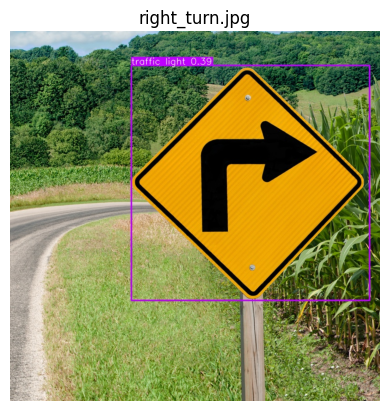

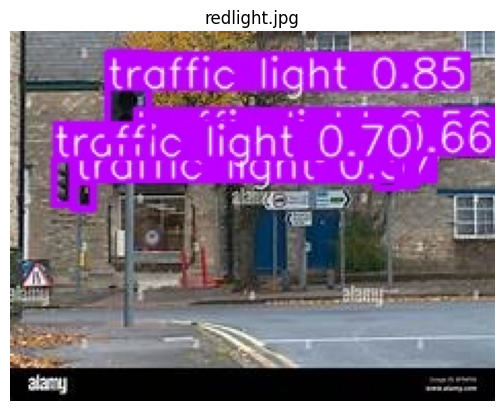

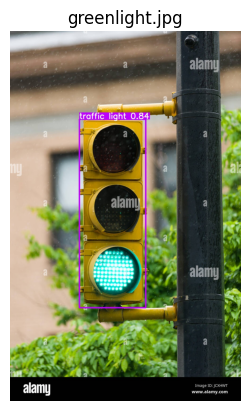

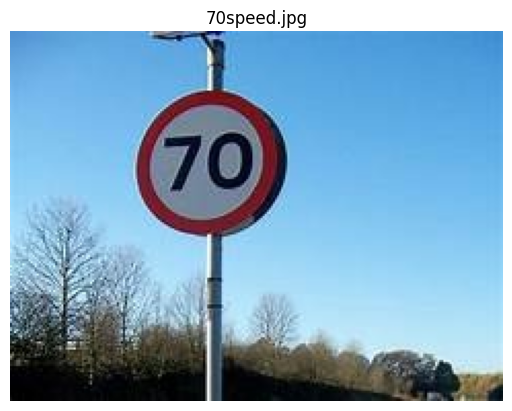

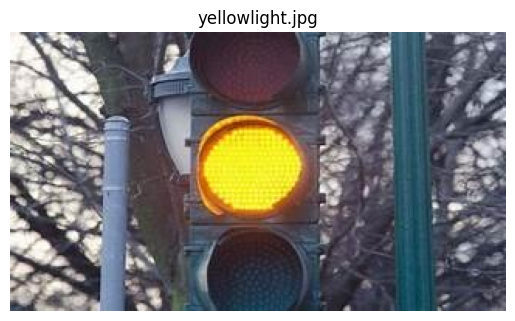

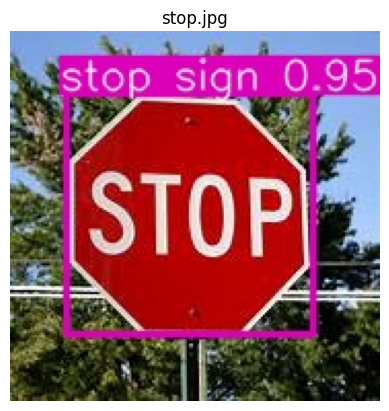

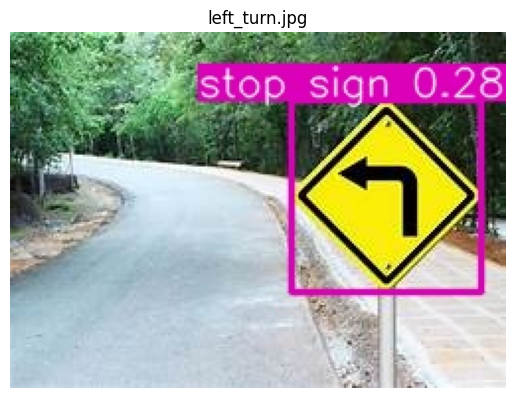

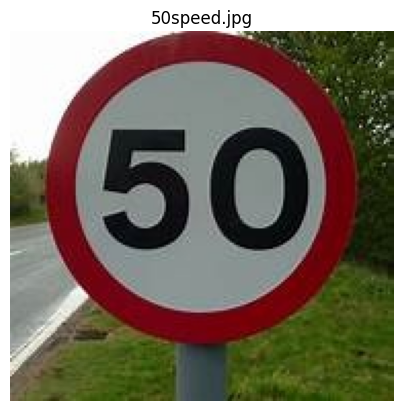

In [15]:
result_dir = "runs/detect/predict"

# Loop through each detected image and display it
for detected_img in glob.glob(os.path.join(result_dir, "*.jpg")):
    img = cv2.imread(detected_img)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis("off")
        plt.title(os.path.basename(detected_img))
        plt.show()
    else:
        print(f"⚠️ Could not load image: {detected_img}")

In [1]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Load model
model = YOLO("yolov8n.pt")


stream_url = "http://192.168.232.249:8080/video"

# Connect to camera stream
cap = cv2.VideoCapture(stream_url)

if not cap.isOpened():
    print("❌ Unable to open camera stream. Check your IP Webcam URL and network.")
else:
    print("✅ Stream connected. Starting detection...")

# Loop to read frames and detect
while True:
    ret, frame = cap.read()
    if not ret:
        print("⚠️ Failed to grab frame")
        break

    results = model.predict(frame, imgsz=640, conf=0.5)

    # Render detection
    annotated_frame = results[0].plot()

    # Display
    clear_output(wait=True)
    plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    time.sleep(0.5)  # Add delay to avoid overloading

cap.release()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

100%|██████████| 6.25M/6.25M [00:00<00:00, 278MB/s]


❌ Unable to open camera stream. Check your IP Webcam URL and network.
⚠️ Failed to grab frame
